In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

def create_data(x):
    return 2.78*x + 3.93

x = np.random.uniform(0,200,1000)
y = create_data(x)
x_train = x[:800]
y_train = y[:800]
x_test = x[800:]
y_test = y[800:]

model = Sequential()
model.add(Dense(64, input_dim=1, activation = 'linear')) # input_dim= features 수(컬럼 수)
model.add(Dense(32, input_dim=1, activation = 'linear'))
#model.add(Dense(16, input_dim=1, activation = 'linear'))
#model.add(Dense(8, input_dim=1, activation = 'linear'))
#model.add(Dense(4, input_dim=1, activation = 'linear'))
#model.add(Dense(1, input_dim=1, activation = 'linear'))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

label_train = y_train.reshape(-1,1)
label_test = y_test.reshape(-1,1)

model.fit(x_train, label_train, batch_size=64, epochs=30,validation_data=(x_test, label_test))

print(model.evaluate(x_test,label_test))
print(model.metrics_names)

print('실제:', create_data(3.5))
pred = np.mean(model.predict([[3.5]]))
print('추정:', pred)
print('오차:',create_data(3.5)-pred)

print('실제:', create_data(40))
pred = np.mean(model.predict([[40]]))
print('추정:', pred)
print('오차:',create_data(40)-pred)

Epoch 1/30
13/13 [==============================] - 2s 109ms/step - loss: 272.4363 - accuracy: 0.0000e+00 - val_loss: 263.5392 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 0s 6ms/step - loss: 260.4770 - accuracy: 0.0000e+00 - val_loss: 248.9799 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 0s 6ms/step - loss: 254.0319 - accuracy: 0.0000e+00 - val_loss: 232.4325 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 0s 6ms/step - loss: 224.1949 - accuracy: 0.0000e+00 - val_loss: 212.9260 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 0s 6ms/step - loss: 209.1342 - accuracy: 0.0000e+00 - val_loss: 189.1187 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 0s 6ms/step - loss: 179.6887 - accuracy: 0.0000e+00 - val_loss: 160.8641 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 0s 6ms/step - loss: 153.8510 - acc

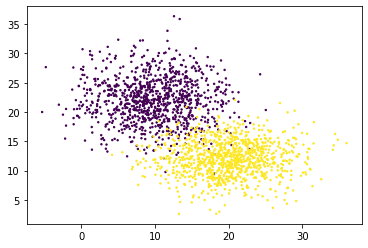

Epoch 1/30
25/25 [==============================] - 1s 12ms/step - loss: 0.4975 - accuracy: 0.5068 - val_loss: 0.4948 - val_accuracy: 0.5100
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.4980 - accuracy: 0.4958 - val_loss: 0.4898 - val_accuracy: 0.5100
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.4726 - val_loss: 0.4768 - val_accuracy: 0.5100
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.5046 - val_loss: 0.4532 - val_accuracy: 0.5100
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.4802 - val_loss: 0.4232 - val_accuracy: 0.5100
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.4233 - accuracy: 0.4870 - val_loss: 0.3930 - val_accuracy: 0.5100
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.3868 - accuracy: 0.6904 - val_loss: 0.3658 - val_accuracy: 0.9475
Epoch 8/30
25/25 [=

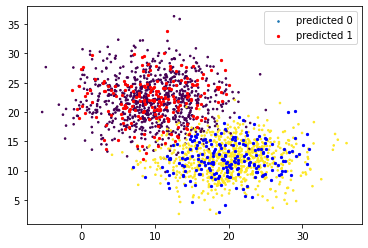

In [19]:
# 딥러닝 - 2진 분류
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# 데이터 생성
x = []
y = []
clf = []
for i in range(1000):
    x.append(np.random.normal(10,5))
    y.append(np.random.normal(22,4))
    clf.append(0)
for i in range(1000):
    x.append(np.random.normal(20,5))
    y.append(np.random.normal(12,3))
    clf.append(1)

plt.scatter(x,y,c=clf, s=2)
plt.show()

#랜덤으로 뽑기 위한 인덱스값 생성
arg = np.arange(0,2000) # 0~1999까지 나열된 배열
r_idx = np.random.choice(arg,1600,replace=False)  # 비복원추출로 위의 배열에서 1600개 추출
r_idx2 = np.delete(arg, r_idx)   # 2000개의 배열에서 1600개의 배열을 제거 (나머지 400개 값 추출)
x_train = []
y_train = []
clf_train = []
x_test = []
y_test = []
clf_test = []
for i in r_idx:
    x_train.append(x[i])
    y_train.append(y[i])
    clf_train.append(clf[i])
for i in r_idx2:
    x_test.append(x[i])
    y_test.append(y[i])
    clf_test.append(clf[i])
x_train = np.array(x_train)
y_train = np.array(y_train)
clf_train = np.array(clf_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
clf_test = np.array(clf_test)

    
model = Sequential()
model.add(Dense(64, input_dim=2, activation = 'sigmoid')) # input_dim= features 수(컬럼 수)
model.add(Dense(32, input_dim=2, activation = 'sigmoid'))
model.add(Dense(16, input_dim=2, activation = 'sigmoid'))
model.add(Dense(8, input_dim=2, activation = 'sigmoid'))
model.add(Dense(4, input_dim=2, activation = 'sigmoid'))
model.add(Dense(1, input_dim=2, activation = 'sigmoid'))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

label_train = clf_train.reshape(-1,1)
label_test = clf_test.reshape(-1,1)

model.fit(np.c_[x_train,y_train], label_train, batch_size=64, epochs=30,validation_data=(np.c_[x_test,y_test], label_test))

print(model.evaluate(np.c_[x_test,y_test],label_test))
print(model.metrics_names)

pick_idx = np.random.randint(0,400,10)
print(type(pick_idx))
pick_x = x_test[pick_idx]
pick_y = y_test[pick_idx]
pick_clf = clf_test[pick_idx]
print(pick_clf)
print('실제:', pick_clf)
pred = model.predict(np.c_[pick_x,pick_y])
pr_val = []
for v in pred:
    pr_val.append(round(v[0],0))
print('추정:', pr_val)

# 학습용 데이터 플롯
plt.scatter(x_train,y_train, c = clf_train, s=2.5)
# 테스트용 데이터에 대한 예측값 산출
pred = model.predict(np.c_[x_test,y_test])
pr_val = []
for v in pred:
    pr_val.append(round(v[0],0))
df = pd.DataFrame(np.c_[x_test,y_test,pr_val],columns=['x','y','clf'])
for i,color in zip([0,1],['r','b']):
    plt.scatter(df['x'][df['clf'].values==i],df['y'][df['clf'].values==i],c = color,s=5)
leg_clf = {'predicted 0':0,'predicted 1':1}
plt.legend(leg_clf)
plt.show()

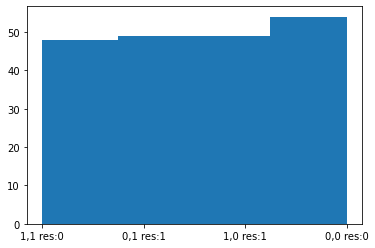

Epoch 1/30
4/4 [==============================] - 1s 129ms/step - loss: 0.5037 - accuracy: 0.4845 - val_loss: 0.4815 - val_accuracy: 0.5800
Epoch 2/30
4/4 [==============================] - 0s 24ms/step - loss: 0.4988 - accuracy: 0.5054 - val_loss: 0.4812 - val_accuracy: 0.5800
Epoch 3/30
4/4 [==============================] - 0s 18ms/step - loss: 0.5039 - accuracy: 0.4835 - val_loss: 0.4809 - val_accuracy: 0.5800
Epoch 4/30
4/4 [==============================] - 0s 21ms/step - loss: 0.5042 - accuracy: 0.4825 - val_loss: 0.4807 - val_accuracy: 0.5800
Epoch 5/30
4/4 [==============================] - 0s 20ms/step - loss: 0.5047 - accuracy: 0.4804 - val_loss: 0.4807 - val_accuracy: 0.5800
Epoch 6/30
4/4 [==============================] - 0s 24ms/step - loss: 0.5006 - accuracy: 0.4976 - val_loss: 0.4807 - val_accuracy: 0.5800
Epoch 7/30
4/4 [==============================] - 0s 25ms/step - loss: 0.5036 - accuracy: 0.4851 - val_loss: 0.4808 - val_accuracy: 0.5800
Epoch 8/30
4/4 [==========

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def xor(x1,x2):
    if x1 != x2:
        return 1
    else:
        return 0
x1 = np.random.randint(0,2,200)
x2 = np.random.randint(0,2,200)
label = []
cat = []
for i in range(len(x1)):
    label.append(xor(x1[i],x2[i]))
    cat.append(str(x1[i])+','+str(x2[i])+' res:'+str(label[i])) # 각 입력값과 결과를 문자열화
label = np.array(label)
x1_test = np.random.randint(0,2,50)
x2_test = np.random.randint(0,2,50)
label_test = []
for i in range(len(x1_test)):
    label_test.append(xor(x1_test[i],x2_test[i]))
label_test = np.array(label_test)
# 결과 히스토그램
plt.hist(cat,bins=4)
plt.show()

model = Sequential()
model.add(Dense(64, input_dim=2, activation = 'sigmoid')) # input_dim= features 수(컬럼 수)
model.add(Dense(32, input_dim=2, activation = 'sigmoid'))
model.add(Dense(16, input_dim=2, activation = 'sigmoid'))
model.add(Dense(8, input_dim=2, activation = 'sigmoid'))
model.add(Dense(4, input_dim=2, activation = 'sigmoid'))
model.add(Dense(1, input_dim=2, activation = 'sigmoid'))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

model.fit(np.c_[x1,x2], label, batch_size=64, epochs=30,validation_data=(np.c_[x1_test,x2_test], label_test))

print(model.evaluate(np.c_[x1_test,x2_test],label_test))
print(model.metrics_names)

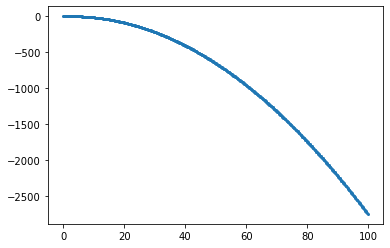

Epoch 1/60
8/8 [==============================] - 1s 2ms/step - loss: 965.7751 - accuracy: 0.0000e+00
Epoch 2/60
8/8 [==============================] - 0s 2ms/step - loss: 537.0985 - accuracy: 0.0000e+00
Epoch 3/60
8/8 [==============================] - 0s 3ms/step - loss: 311.0944 - accuracy: 0.0000e+00
Epoch 4/60
8/8 [==============================] - 0s 2ms/step - loss: 171.9943 - accuracy: 0.0000e+00
Epoch 5/60
8/8 [==============================] - 0s 2ms/step - loss: 90.2256 - accuracy: 0.0000e+00
Epoch 6/60
8/8 [==============================] - 0s 3ms/step - loss: 48.0309 - accuracy: 0.0000e+00
Epoch 7/60
8/8 [==============================] - 0s 3ms/step - loss: 38.1848 - accuracy: 0.0000e+00
Epoch 8/60
8/8 [==============================] - 0s 3ms/step - loss: 26.7973 - accuracy: 0.0000e+00
Epoch 9/60
8/8 [==============================] - 0s 3ms/step - loss: 24.3363 - accuracy: 0.0000e+00
Epoch 10/60
8/8 [==============================] - 0s 3ms/step - loss: 21.7991 - accura

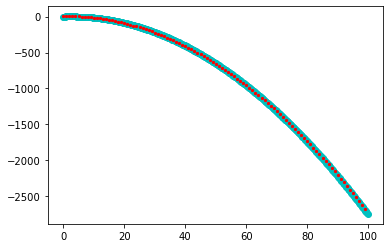

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

def func(x):
    return -0.29*x**2 + 1.46*x - 0.48
x_train = np.arange(0,100,0.2)
y = func(x_train)
#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train.reshape(-1,1))
plt.scatter(x,y,s=4)
plt.show()

model = Sequential()
model.add(Dense(64, input_dim=3, activation = 'linear')) # input_dim= features 수(컬럼 수)
model.add(Dense(32, input_dim=3, activation = 'linear'))
model.add(Dense(16, input_dim=3, activation = 'linear'))
#model.add(Dense(8, input_dim=3, activation = 'linear'))
#model.add(Dense(4, input_dim=3, activation = 'linear'))
#model.add(Dense(1, input_dim=3, activation = 'linear'))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

# 학습
model.fit(x_train_poly, y, batch_size=64, epochs=60)
# 학습 결과값(loss, accuracy)
print(model.evaluate(x_train_poly,y))
print(model.metrics_names)

# 기존 값 플롯
plt.scatter(x,y, c='c')

# 테스트용 데이터 생성
x_test = np.arange(0,100,1)
x_test_poly = polynomial_features.fit_transform(x_test.reshape(-1,1))
# 테스트용 데이터 예측
pred_total = model.predict(x_test_poly)
pred=[]
for p in pred_total:
    pred.append(np.mean(p))
# 예측값 플롯
plt.scatter(x_test,pred,c='r', s = 5)
plt.show()